48000


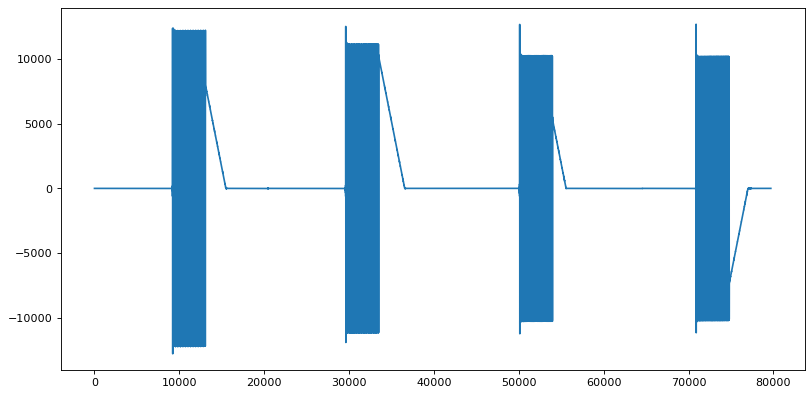

Captured from  9196 : 15515
Captured from  29583 : 36582
Captured from  50078 : 55589
Captured from  70862 : 77016
1840 	 84.0 	 T
2010 	 101.0 	 e
2150 	 115.0 	 s
2160 	 116.0 	 t


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import wavfile
from matplotlib.pyplot import figure
import scipy as sy
import scipy.fftpack as syfp

# Code Source for Frequency Analysis: https://gist.github.com/endolith/255291 #
from scipy.signal import blackmanharris, correlate
from numpy import argmax, mean, diff, log, nonzero
from numpy.fft import rfft
def parabolic(f, x):
    """Quadratic interpolation for estimating the true position of an
    inter-sample maximum when nearby samples are known.
    f is a vector and x is an index for that vector.
    Returns (vx, vy), the coordinates of the vertex of a parabola that goes
    through point x and its two neighbors.
    Example:
    Defining a vector f with a local maximum at index 3 (= 6), find local
    maximum if points 2, 3, and 4 actually defined a parabola.
    In [3]: f = [2, 3, 1, 6, 4, 2, 3, 1]
    In [4]: parabolic(f, argmax(f))
    Out[4]: (3.2142857142857144, 6.1607142857142856)
    """
    xv = 1/2. * (f[x-1] - f[x+1]) / (f[x-1] - 2 * f[x] + f[x+1]) + x
    yv = f[x] - 1/4. * (f[x-1] - f[x+1]) * (xv - x)
    return (xv, yv)
def freq_from_fft(sig, fs):
    """
    Estimate frequency from peak of FFT
    """
    # Compute Fourier transform of windowed signal
    windowed = sig * blackmanharris(len(sig))
    f = rfft(windowed)

    # Find the peak and interpolate to get a more accurate peak
    i = argmax(abs(f))  # Just use this for less-accurate, naive version
    true_i = parabolic(log(abs(f)), i)[0]

    # Convert to equivalent frequency
    return fs * true_i / len(windowed)

# End Code from GitHub/endolith #

def Round10(num):
    return round(num/10)*10

def GetWaveParts(wave):
    #print(wave.__len__())
    md = stats.mode(wave)[0][0] #[0][0] because it gets returns inside a larger object.
    #print(md)
    start = 0
    trail = 0
    end = 0
    waves = []
    for i in range(0, wave.__len__()):
        if wave[i] > 50 and start == 0:
            start = i
        if (wave[i] == 0 or wave[i] == 1) and start != 0:
            trail += 1
        if trail >= 10:
            end = i - 3
            print("Captured from ", start, ":", end)
            seg = wave[start:end]
            waves.append(seg)
            start = 0
            end = 0
            trail = 0
    return waves

figure(figsize=(12, 6), dpi=80)

samplerate, data = wavfile.read('test_Test.wav')
fs = 1/samplerate
print(samplerate)
plt.plot(data)
plt.show()
waves = GetWaveParts(data)

for w in waves:
    f = Round10(freq_from_fft(w, samplerate))
    c = (f-1000)/10
    print(f, '\t', c, '\t', chr(int(c)))


# 'Test'
#ByteVal/Freq
#84/1840
#101/2010
#115/2150
#116/2160

